In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset_train=pd.read_csv("Google.csv")
dataset_train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-01-03,89.830002,91.550003,89.019997,89.699997,89.699997,20738500
1,2023-01-04,91.010002,91.239998,87.800003,88.709999,88.709999,27046500
2,2023-01-05,88.070000,88.209999,86.559998,86.769997,86.769997,23136100
3,2023-01-06,87.360001,88.470001,85.570000,88.160004,88.160004,26612600
4,2023-01-09,89.195000,90.830002,88.580002,88.800003,88.800003,22996700


In [3]:
training_set = dataset_train.iloc[:,1:2].values
print('shape is ={}'.format(training_set.shape))
print(training_set[0:5])

shape is =(251, 1)
[[89.830002]
 [91.010002]
 [88.07    ]
 [87.360001]
 [89.195   ]]


In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_training_set = scaler.fit_transform(training_set)
scaled_training_set

array([[-1.7985802 ],
       [-1.7268906 ],
       [-1.90550719],
       [-1.9486424 ],
       [-1.83715905],
       [-1.9875249 ],
       [-1.78460705],
       [-1.64244267],
       [-1.6954202 ],
       [-1.61935637],
       [-1.60963557],
       [-1.7038043 ],
       [-1.42676662],
       [-1.23356921],
       [-1.20805221],
       [-1.35082424],
       [-1.28520991],
       [-1.23842916],
       [-1.2569591 ],
       [-1.31072643],
       [-1.19650927],
       [-0.76819408],
       [-0.96746682],
       [-1.01758903],
       [-0.96017665],
       [-1.01728502],
       [-1.14790597],
       [-1.43952488],
       [-1.48387499],
       [-1.50513873],
       [-1.50027878],
       [-1.45167548],
       [-1.48022987],
       [-1.59140964],
       [-1.67075423],
       [-1.65884653],
       [-1.81073129],
       [-1.78278455],
       [-1.81619889],
       [-1.77853129],
       [-1.79675765],
       [-1.62178659],
       [-1.52336508],
       [-1.45896613],
       [-1.52063128],
       [-1

In [5]:
X_train = []
Y_train = []
for i in range(50,250):
    X_train.append(scaled_training_set[i-50:i, 0])
    Y_train.append(scaled_training_set[i, 0])
X_train = np.array(X_train)
Y_train = np.array(Y_train)
print(X_train.shape)
print(Y_train.shape)

(200, 50)
(200,)


In [6]:
X_train = np.reshape(X_train,(X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(200, 50, 1)

In [7]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

In [8]:
regressor = Sequential()
regressor.add(LSTM(units = 100, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.3))
regressor.add(LSTM(units = 100, return_sequences = True))
regressor.add(Dropout(0.3))
regressor.add(LSTM(units = 100, return_sequences = True))
regressor.add(Dropout(0.3))
regressor.add(LSTM(units = 100))
regressor.add(Dropout(0.3))
regressor.add(Dense(units = 1))

In [9]:
from keras.optimizers import RMSprop
regressor.compile(optimizer=RMSprop(), loss='mean_squared_error')
regressor.fit(X_train, Y_train, epochs = 200, batch_size = 16)

Epoch 1/200

13/13 [==============================] - 5s 45ms/step - loss: 0.2571
Epoch 2/200
13/13 [==============================] - 1s 45ms/step - loss: 0.1142
Epoch 3/200
13/13 [==============================] - 1s 45ms/step - loss: 0.1012
Epoch 4/200
13/13 [==============================] - 1s 45ms/step - loss: 0.1107
Epoch 5/200
13/13 [==============================] - 1s 46ms/step - loss: 0.1148
Epoch 6/200
13/13 [==============================] - 1s 50ms/step - loss: 0.1245
Epoch 7/200
13/13 [==============================] - 1s 49ms/step - loss: 0.1163
Epoch 8/200
13/13 [==============================] - 1s 48ms/step - loss: 0.1061
Epoch 9/200
13/13 [==============================] - 1s 47ms/step - loss: 0.0945
Epoch 10/200
13/13 [==============================] - 1s 46ms/step - loss: 0.1023
Epoch 11/200
13/13 [==============================] - 1s 47ms/step - loss: 0.0827
Epoch 12/200
13/13 [==============================] - 1s 45ms/step - loss: 0.0858
Epoch 13/200
13/13 [====

13/13 [==============================] - 1s 45ms/step - loss: 0.0297
Epoch 99/200
13/13 [==============================] - 1s 44ms/step - loss: 0.0291
Epoch 100/200
13/13 [==============================] - 1s 48ms/step - loss: 0.0272
Epoch 101/200
13/13 [==============================] - 1s 46ms/step - loss: 0.0262
Epoch 102/200
13/13 [==============================] - 1s 45ms/step - loss: 0.0322
Epoch 103/200
13/13 [==============================] - 1s 45ms/step - loss: 0.0355
Epoch 104/200
13/13 [==============================] - 1s 45ms/step - loss: 0.0225
Epoch 105/200
13/13 [==============================] - 1s 44ms/step - loss: 0.0323
Epoch 106/200
13/13 [==============================] - 1s 46ms/step - loss: 0.0322
Epoch 107/200
13/13 [==============================] - 1s 45ms/step - loss: 0.0303
Epoch 108/200
13/13 [==============================] - 1s 45ms/step - loss: 0.0292
Epoch 109/200
13/13 [==============================] - 1s 45ms/step - loss: 0.0307
Epoch 110/200
13/13

13/13 [==============================] - 1s 48ms/step - loss: 0.0271
Epoch 197/200
13/13 [==============================] - 1s 46ms/step - loss: 0.0227
Epoch 198/200
13/13 [==============================] - 1s 48ms/step - loss: 0.0218
Epoch 199/200
13/13 [==============================] - 1s 47ms/step - loss: 0.0216
Epoch 200/200
13/13 [==============================] - 1s 45ms/step - loss: 0.0227


In [11]:
dataset_test = pd.read_csv("Google.csv")
predicted_stock_price = dataset_test.iloc[:,1:2].values

In [12]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test)-60:].values
inputs = inputs.reshape(-1, 1)
inputs = scaler.transform(inputs)
X_test = []
for i in range(50, 70):
    X_test.append(inputs[i-50:i, 0])
X_test = np.array(X_test)
Y_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [13]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

1/1 [==============================] - 1s 1s/step


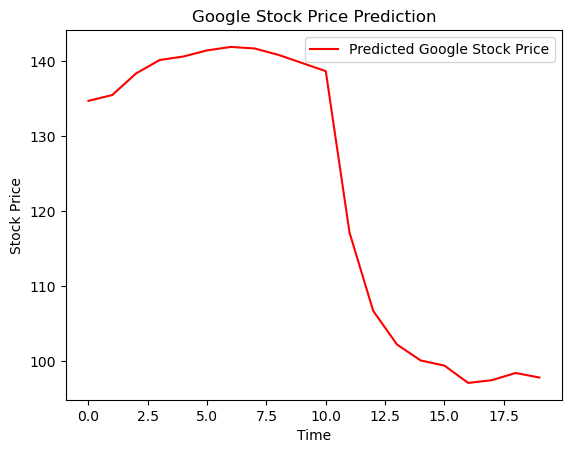

In [14]:
plt.plot(predicted_stock_price, color = 'red', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()